In [35]:
import pandas as pd
import sqlite3 as sql
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
path = os.getcwd()
path = os.path.dirname(path)
path = os.path.join(path,'data/understat/understat.db')

In [37]:
con = sql.connect(path)

test = pd.read_sql("""SELECT player_stats.*
                      FROM player_stats
                      WHERE player_stats.name =  'Declan Rice'
                      LIMIT 10;""",con)
con.close()
test

,player_id,name,season,position,games,goals,shots,time,xG,assists,xA,key_passes,team,yellow,red,npg,npxG,xGChain,xGBuildup
0,5553,Declan Rice,2024,MC,4,0,3,319,0.173514,0,0.571090,2,Arsenal,2,1,0,0.173514,1.758567,1.057255
1,5553,Declan Rice,2023,MC,38,7,58,3256,3.186094,8,5.895036,47,Arsenal,5,0,7,3.186094,19.678101,16.131324
2,5553,Declan Rice,2022,DMC,37,4,36,3268,2.234948,1,2.338052,36,West Ham,5,0,4,1.473779,10.850467,8.603919
3,5553,Declan Rice,2021,DMC,36,1,26,3175,1.044251,4,1.555867,23,West Ham,8,0,1,1.044251,15.582120,14.247516
4,5553,Declan Rice,2020,DMC,32,2,28,2880,3.191765,1,1.978934,23,West Ham,2,0,1,1.669428,10.661636,9.188757
5,5553,Declan Rice,2019,DMC,38,1,31,3420,1.266390,3,1.306304,22,West Ham,6,0,1,1.266390,8.693384,7.636570
6,5553,Declan Rice,2018,DMC,34,2,22,3009,1.233570,0,0.642966,9,West Ham,4,0,2,1.233570,8.087485,7.640720
7,5553,Declan Rice,2017,Sub,26,0,5,1419,0.233927,0,0.090773,2,West Ham,1,0,0,0.233927,1.238096,1.034031
8,5553,Declan Rice,2016,Sub,1,0,0,1,0.000000,0,0.000000,0,West Ham,0,0,0,0.000000,0.077354,0.077354


In [38]:
# Connect to the sqlite3 database file.  
con = sql.connect(path)

# read the .db file from the specified SQL commands
declan = pd.read_sql("""SELECT player_stats.name AS name,
                                game_stats.league AS league,
                                avg(player_stats.xG) AS avg_xG,
                                avg(player_stats.goals) AS avg_goals,
                                player_stats.season AS season,
                                player_stats.team
                          FROM player_stats
                          LEFT JOIN game_stats ON game_stats.club_name = player_stats.team
                          WHERE name = 'Declan Rice'
                          GROUP BY team,player_stats.season
                          ORDER BY player_stats.season
                          LIMIT 10;""",con)

#'SELECT * FROM players' says that we are selecting all the columns from the players table, and LIMIT 10 just limits it
# to just the first 10

# We need to close the connection
con.close()

declan

,name,league,avg_xG,avg_goals,season,team
0,Declan Rice,EPL,0.000000,0.0,2016,West Ham
1,Declan Rice,EPL,0.233927,0.0,2017,West Ham
2,Declan Rice,EPL,1.233570,2.0,2018,West Ham
3,Declan Rice,EPL,1.266390,1.0,2019,West Ham
4,Declan Rice,EPL,3.191765,2.0,2020,West Ham
5,Declan Rice,EPL,1.044251,1.0,2021,West Ham
6,Declan Rice,EPL,2.234948,4.0,2022,West Ham
7,Declan Rice,EPL,3.186094,7.0,2023,Arsenal
8,Declan Rice,EPL,0.173514,0.0,2024,Arsenal


In [39]:
# Connect to the sqlite3 database file.  
con = sql.connect(path)

# read the .db file from the specified SQL commands
player = pd.read_sql("""SELECT player_stats.name AS name,
                                player_stats.position,
                                game_stats.league AS league,
                                avg(player_stats.xG) AS avg_xG,
                                avg(player_stats.goals) AS avg_goals,
                                player_stats.season AS season,
                                player_stats.team
                          FROM player_stats
                          LEFT JOIN game_stats ON game_stats.club_name = player_stats.team
                          GROUP BY name, player_stats.season
                          ORDER BY name, player_stats.season
                          LIMIT 30;""",con)

#'SELECT * FROM players' says that we are selecting all the columns from the players table, and LIMIT 10 just limits it
# to just the first 10

# We need to close the connection
con.close()

player

,name,position,league,avg_xG,avg_goals,season,team
0,Aaron Ciammaglichella,Sub,Serie A,0.000000,0.000000,2024,Torino
1,Aaron Connolly,Sub,EPL,4.553528,3.000000,2019,Brighton
2,Aaron Connolly,Sub,EPL,4.464138,2.000000,2020,Brighton
3,Aaron Connolly,Sub,EPL,0.599489,0.000000,2021,Brighton
4,Aaron Cresswell,DL,EPL,1.242633,2.000000,2014,West Ham
5,Aaron Cresswell,DL,EPL,1.092563,2.000000,2015,West Ham
6,Aaron Cresswell,ML,EPL,0.585906,0.000000,2016,West Ham
7,Aaron Cresswell,Sub,EPL,0.674735,1.000000,2017,West Ham
8,Aaron Cresswell,DL,EPL,0.419239,0.000000,2018,West Ham
9,Aaron Cresswell,DL,EPL,1.032539,3.000000,2019,West Ham


## Lets study the player stats
Some things we can do
- find the average stats for each position
- find the top players in terms of stats
- each team avg stats
- ect...


In [40]:
con = sql.connect(path)

player_stats = pd.read_sql("""SELECT player_stats.name,
                                    player_stats.position,
                                    game_stats.league,
                                    player_stats.xG,
                                    player_stats.goals,
                                    player_stats.season,
                                    player_stats.team
                                FROM player_stats
                                LEFT JOIN game_stats ON game_stats.club_name = player_stats.team
                                WHERE player_stats.season = '2023' AND game_stats.league = 'EPL'
                                GROUP BY player_stats.name
                                ORDER BY player_stats.name;""",con)

con.close()
player_stats

,name,position,league,xG,goals,season,team
0,Aaron Cresswell,DL,EPL,0.000000,0,2023,West Ham
1,Aaron Hickey,DR,EPL,0.193487,0,2023,Brentford
2,Aaron Ramsdale,GK,EPL,0.000000,0,2023,Arsenal
3,Aaron Ramsey,Sub,EPL,0.402008,0,2023,Burnley
4,Aaron Wan-Bissaka,DR,EPL,0.146212,0,2023,Manchester United
...,...,...,...,...,...,...,...
564,Yves Bissouma,DMC,EPL,1.166374,0,2023,Tottenham
565,Zack Nelson,Sub,EPL,0.000000,0,2023,Luton
566,Zanka,Sub,EPL,0.600031,1,2023,Brentford
567,Zeki Amdouni,FW,EPL,6.100483,5,2023,Burnley


## Lets look at the avg stats for each position

Unfortunatly, there is no clear defensive stats we can actually measure here, mostly on the performance of how well they contribute to the offense.

In [41]:
con = sql.connect(path)

pos_avg = pd.read_sql("""SELECT 
                                    player_stats.position,
                                    game_stats.league,
                                    avg(player_stats.xG) AS avg_xG,
                                    avg(player_stats.goals) AS avg_goals,
                                    avg(player_stats.xA) AS avg_xA,
                                    avg(player_stats.assists) AS avg_assists,
                                    avg(player_stats.xGChain) AS avg_xGChain,
                                    avg(player_stats.xGBuildup) AS avg_xGBuildup,
                                    avg(player_stats.yellow) AS avg_yellow,
                                    player_stats.season
                                FROM player_stats
                                LEFT JOIN game_stats ON game_stats.club_name = player_stats.team
                                WHERE player_stats.season = '2023' AND game_stats.league = 'EPL'
                                GROUP BY player_stats.position
                                ;""",con)

con.close()
pos_avg

,position,league,avg_xG,avg_goals,avg_xA,avg_assists,avg_xGChain,avg_xGBuildup,avg_yellow,season
0,AMC,EPL,6.506244,5.489263,4.509405,4.058732,13.912213,6.531024,3.493920,2023
1,AML,EPL,4.951888,6.197870,4.564228,3.644932,14.222706,7.338750,2.861846,2023
2,AMR,EPL,5.319716,6.266158,5.659311,5.303613,14.700002,6.800981,4.716274,2023
3,DC,EPL,1.483223,1.424468,0.889090,0.788596,8.316026,7.818347,3.803912,2023
4,DL,EPL,1.316635,1.012147,1.965963,1.269281,7.517959,5.654590,4.001756,2023
5,DMC,EPL,2.787905,2.872635,3.313190,3.092601,10.571742,7.468714,5.136748,2023
6,DML,EPL,0.981323,0.132258,1.229384,0.754839,3.575163,2.106844,3.693548,2023
7,DMR,EPL,0.261232,0.000000,2.097977,1.816129,2.957481,1.911887,1.429032,2023
8,DR,EPL,0.905923,0.577859,2.475189,2.586315,8.601936,6.810774,3.872642,2023
9,FW,EPL,10.364910,9.020718,2.672056,2.708597,12.876872,3.153926,3.097673,2023


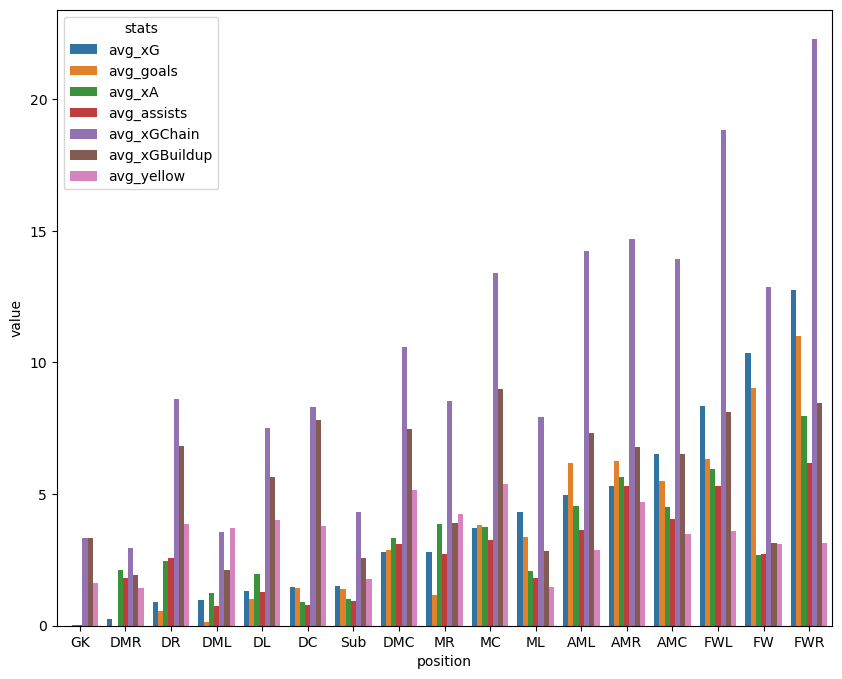

In [42]:
data = pos_avg[['position','avg_xG','avg_goals','avg_xA','avg_assists','avg_xGChain','avg_xGBuildup','avg_yellow']]
data = data.sort_values(by='avg_xG')
plt.figure(figsize=(10,8))
data_melted = data.melt(id_vars='position',var_name = 'stats',value_name = 'value')

sns.barplot(x='position',y='value',hue='stats',data=data_melted)
plt.show()

## Lets look at individual teams and their avg player performance

We will look at the positions above and see how the teams are in each position.

In [43]:
con = sql.connect(path)

team_pos_avg = pd.read_sql("""SELECT player_stats.team AS club,
                                    CASE
                                        WHEN player_stats.position LIKE 'FW%' 
                                        OR player_stats.position LIKE 'AM%' THEN 'attacking'
                                        WHEN player_stats.position LIKE 'M%' 
                                        OR player_stats.position LIKE 'DM%' THEN 'midfield'
                                        WHEN player_stats.position LIKE 'D%' THEN 'defender'
                                        WHEN player_stats.position LIKE 'GK' THEN 'Goalkeeper'
                                        ELSE 'sub'
                                    END AS position_category,
                                    player_stats.position,
                                    game_stats.league,
                                    avg(player_stats.xG) AS avg_xG,
                                    avg(player_stats.goals) AS avg_goals,
                                    avg(player_stats.xA) AS avg_xA,
                                    avg(player_stats.assists) AS avg_assists,
                                    avg(player_stats.xGChain) AS avg_xGChain,
                                    avg(player_stats.xGBuildup) AS avg_xGBuildup,
                                    avg(player_stats.yellow) AS avg_yellow,
                                    player_stats.season
                                FROM player_stats
                                LEFT JOIN game_stats ON game_stats.club_name = player_stats.team
                                WHERE player_stats.season = '2023' 
                                    AND game_stats.league = 'EPL'
                                    AND club IN ('Arsenal','Manchester City','Aston Villa','Liverpool','Chelsea')
                                GROUP BY player_stats.position, club
                                ;""",con)

con.close()
team_pos_avg

,club,position_category,position,league,avg_xG,avg_goals,avg_xA,avg_assists,avg_xGChain,avg_xGBuildup,avg_yellow,season
0,Aston Villa,attacking,AMC,EPL,6.457845,6.000000,8.621126,8.000000,17.952719,6.211081,1.000000,2023
1,Chelsea,attacking,AMC,EPL,4.345701,4.500000,2.609881,2.500000,9.880707,4.501775,4.500000,2023
2,Manchester City,attacking,AMC,EPL,14.373571,11.000000,5.823112,8.000000,27.162230,13.089299,2.000000,2023
3,Aston Villa,attacking,AML,EPL,4.672284,6.000000,5.626847,4.000000,20.780677,13.845142,9.000000,2023
4,Manchester City,attacking,AML,EPL,6.845744,11.000000,5.645278,4.500000,21.029769,12.247574,4.000000,2023
5,Aston Villa,attacking,AMR,EPL,6.465565,10.000000,10.299158,9.000000,17.989742,6.671372,5.000000,2023
6,Manchester City,attacking,AMR,EPL,3.933334,4.500000,7.002286,8.500000,19.497249,11.639760,5.500000,2023
7,Arsenal,defender,DC,EPL,2.191552,3.000000,2.503871,2.500000,18.390531,16.862639,6.000000,2023
8,Aston Villa,defender,DC,EPL,1.108713,0.333333,0.560435,0.333333,7.362822,6.951128,2.666667,2023
9,Chelsea,defender,DC,EPL,1.190932,1.500000,1.097999,0.750000,11.380814,10.954818,3.500000,2023


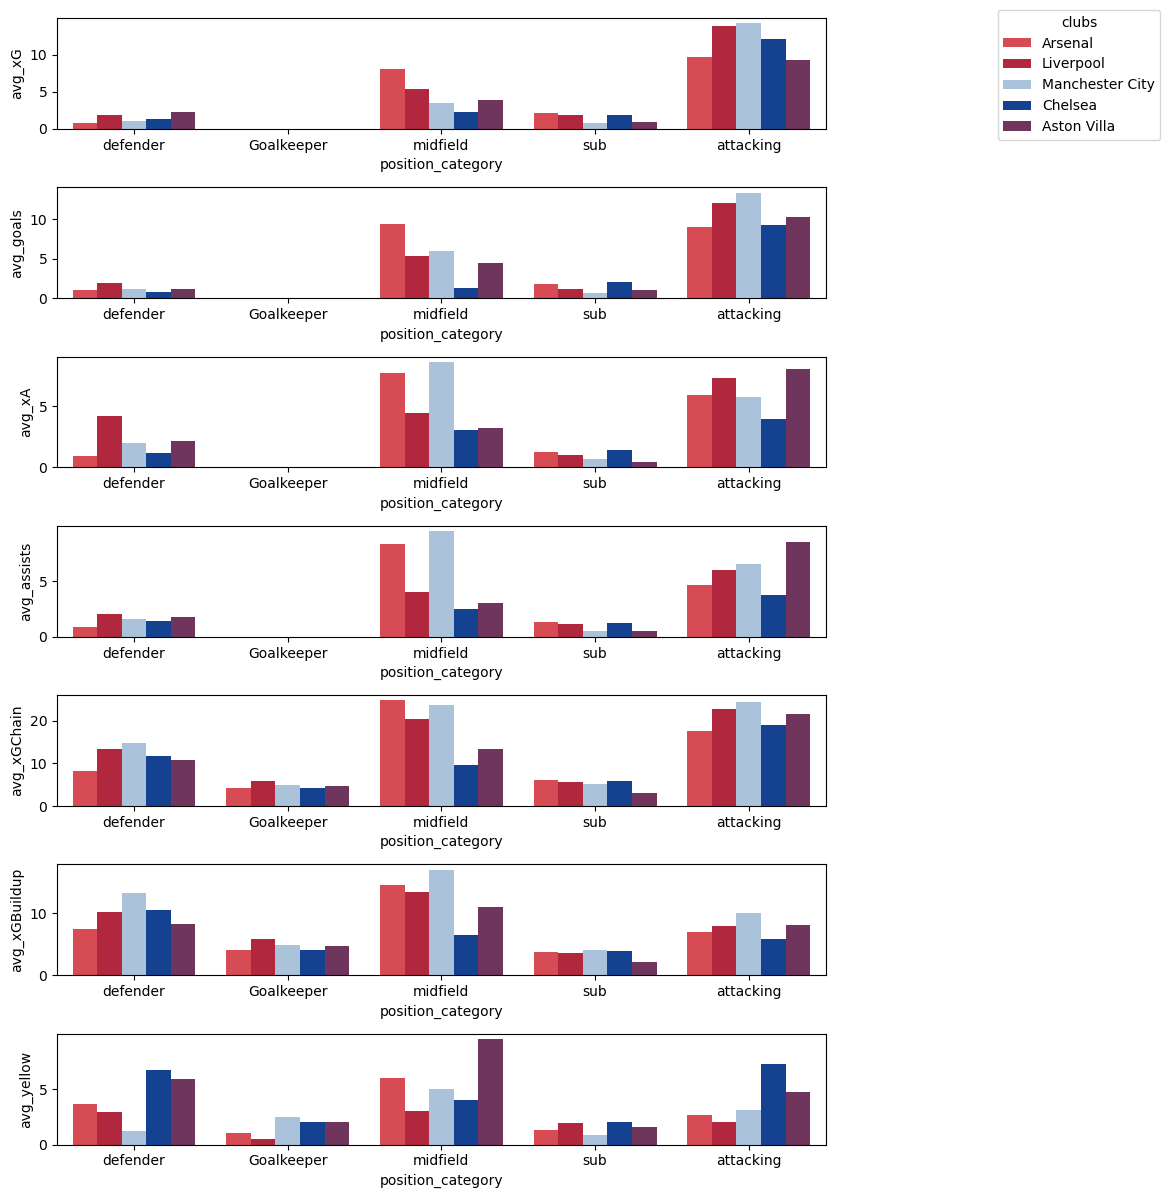

In [46]:
stats = ['club','position_category','avg_xG','avg_goals','avg_xA','avg_assists','avg_xGChain','avg_xGBuildup','avg_yellow']
data = team_pos_avg[stats]
data = data.sort_values(by='avg_xG')
custom_palette = {
    'Arsenal' : '#EF3340',
    'Liverpool': '#c8102E',
    'Manchester City': '#A2C2E2',
    'Aston Villa': '#7A2B60',
    'Chelsea' : '#003DA5'
}
fig, axes = plt.subplots(ncols=1,nrows=len(stats[2:]),figsize=(10,12))

for ax,stat in zip(axes,stats[2:]):
    
    sns.barplot(x='position_category',y=stat,hue='club',data=data,ax=ax,palette=custom_palette,errorbar=None)
    ax.get_legend().remove()

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles=handles,labels=labels,title='clubs',bbox_to_anchor=(1,1),loc='upper left')
plt.tight_layout(rect=[0,0,0.85,1])
plt.show()